# Preparing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
from sklearn.model_selection import train_test_split, GroupShuffleSplit
import sys
import os
import random
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,make_scorer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,os.path.join(parentdir,"src")) 
import pickle
import utils
import imputer
import classifier
%matplotlib inline
pd.options.display.max_columns = None
plt.rcParams["figure.figsize"]=20,10




In [2]:
Anova_feature_subset = ['mean_dt_TV1_TV3','mean_dt_TV1_TV2','med_dt_TV1_TV3','med_dt_TV1_TV2',
 'min_dt_TV1_TV3','mean_lifetime_cancel','mean_dt_TV1_TV4',
 'min_dt_TV1_TV2','med_dt_TV1_TV4','min_dt_TV1_TV4','OMR',
 'NbTradeVenueMic','90_p_lifetime_cancel','mean_time_two_events',
 '75_p_lifetime_cancel','med_lifetime_cancel','90_p_time_two_events',
 '25_p_lifetime_cancel','min_lifetime_cancel','max_time_two_events']
RF_feature_subset = ['min_lifetime_cancel','OMR','OCR','10_p_lifetime_cancel',
 'NbTradeVenueMic','25_p_lifetime_cancel','max_time_two_events',
 'med_lifetime_cancel','mean_time_two_events','90_p_time_two_events','OTR',
 '75_p_lifetime_cancel','min_dt_TV1_TV2','min_dt_TV1']


In [3]:
paths = ["../data/AMF_train_X_XCZw8r3.csv","../data/AMF_test_X_uDs0jHH.csv","../data/AMF_train_Y_omYQJZL.csv"]
X, X_test, y_trader = utils.load_data(paths)
display(X.head())

Index    Share      Day     Trader       OTR        OCR         OMR  \
0      1   Isin_8  Date_24  Trader_10  2.272727   8.333333   12.500000   
1      2  Isin_87  Date_29  Trader_10  1.696629  25.166667   21.571429   
2      3  Isin_87  Date_23  Trader_10  1.482759  47.300000  118.250000   
3      4  Isin_12  Date_11  Trader_10  1.705882  14.500000   29.000000   
4      5  Isin_87   Date_9  Trader_10  1.517730  26.750000         NaN   

   min_time_two_events  mean_time_two_events  10_p_time_two_events  \
0                  0.0           5117.830300              0.000000   
1                  0.0           1846.968401              0.000074   
2                  0.0            686.300630              0.000071   
3                  0.0           2174.335265              0.000000   
4                  0.0            944.008551              0.000071   

   med_time_two_events  25_p_time_two_events  75_p_time_two_events  \
0           419.688500             10.722543            984.320560   
1             0.003374              0.000204              8.768699   
2             0.000599              0.000129              5.725427   
3             6.152666              0.000945             62.444176   
4             0.001364              0.000146              2.225420   

   90_p_time_two_events  max_time_two_events  min_lifetime_cancel  \
0           23151.83800            25139.598           682.153260   
1            2671.48830            31278.357            11.866026   
2             448.88360            30799.467             2.761036   
3           19187.71900            19187.719           286.019320   
4             273.45676            23164.514             2.798452   

   mean_lifetime_cancel  10_p_lifetime_cancel  med_lifetime_cancel  \
0           8272.770569            682.153260            984.32056   
1           3796.632686             11.866026            177.93991   
2           1397.103679              2.761036            187.99548   
3           9736.869034            286.019320            286.01932   
4          10066.803992              2.798452           1345.95280   

   25_p_lifetime_cancel  75_p_lifetime_cancel  90_p_lifetime_cancel  \
0             682.15326           23151.83800            23151.8380   
1              73.74323             808.26230            21433.6840   
2              19.77734             418.23984             1953.6235   
3             286.01932           19187.71900            19187.7190   
4             662.57434           21903.78300            23164.5140   

   max_lifetime_cancel  NbTradeVenueMic  MaxNbTradesBySecond  \
0            23151.838                1                    7   
1            21433.684                1                   17   
2            10842.464                1                   20   
3            19187.719                1                    8   
4            23164.514                1                   19   

   MeanNbTradesBySecond  min_dt_TV1  mean_dt_TV1   med_dt_TV1  min_dt_TV1_TV2  \
0              2.750000  351.702399  9639.216031  1585.079495             NaN   
1              5.933333    0.000066   493.559196     0.000901             NaN   
2              5.063492    0.000018   163.954785     0.000770             NaN   
3              4.250000    0.000148  1232.562133     0.004301             NaN   
4              3.710526    0.000025   248.073927     0.001364             NaN   

   mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  mean_dt_TV1_TV3  \
0              NaN             NaN             NaN              NaN   
1              NaN             NaN             NaN              NaN   
2              NaN             NaN             NaN              NaN   
3              NaN             NaN             NaN              NaN   
4              NaN             NaN             NaN              NaN   

   med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  med_dt_TV1_TV4  \
0             NaN             NaN              NaN             NaN   
1             

In [4]:
X_train, X_validation, y_train, y_validation,traders_train, traders_validation = utils.prepare_split_data(X,
                                        stratify=True,test_size=0.5)



X_train_fs_RF = X_train[RF_feature_subset]
X_train_fs_anova = X_train[Anova_feature_subset]
X_validation_fs_RF = X_validation[RF_feature_subset]
X_validation_fs_anova = X_validation[Anova_feature_subset]
print("The shape of X_train is {}".format(X_train.shape))
print("The shape of X_validation is {}".format(X_validation.shape))
print("The shape of X_test is {}".format(X_test.shape))


The shape of X_train is (52891, 35)
The shape of X_validation is (52891, 35)
The shape of X_test is (85304, 39)


## Testing row classifiers

In [11]:
missing_values_cols = utils.find_missing(X_train)
f1_micro = make_scorer(f1_score,average='micro')
names = ["SVM","Random Forests","Gradient Boosting","LDA","QDA","MLP"]

model_RF = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols)), ('classifier', RandomForestClassifier())])
model_SVM = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols)),('scaler', StandardScaler()), ('classifier', SVC())])
model_GB = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols)), ('classifier', GradientBoostingClassifier())])
model_QDA = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols)), ('classifier', QuadraticDiscriminantAnalysis())])
model_LDA = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols)), ('classifier', LinearDiscriminantAnalysis())])
model_MLP = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols)),('scaler', StandardScaler()), ('classifier', MLPClassifier())])
models = [model_SVM,model_RF,model_GB,model_LDA,model_QDA,model_MLP]

SearchClassifier = classifier.BestClassifier(models,f1_micro,names)
SearchClassifier.search(X_train,y_train)
SearchClassifier.fit_save(X_train,y_train,"../models/best_row_model.sav")

The best model is Random Forests with a cross validation score 0.9753076757427677:


In [12]:
missing_values_cols_fs_RF = utils.find_missing(X_train_fs_RF)
model_RF = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_RF)), ('classifier', RandomForestClassifier())])
model_SVM = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_RF)),('scaler', StandardScaler()), ('classifier', SVC())])
model_GB = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_RF)), ('classifier', GradientBoostingClassifier())])
model_QDA = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_RF)), ('classifier', QuadraticDiscriminantAnalysis())])
model_LDA = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_RF)), ('classifier', LinearDiscriminantAnalysis())])
model_MLP = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_RF)),('scaler', StandardScaler()), ('classifier', MLPClassifier())])
models = [model_SVM,model_RF,model_GB,model_LDA,model_QDA,model_MLP]

SearchClassifier = classifier.BestClassifier(models,f1_micro,names)
SearchClassifier.search(X_train_fs_RF,y_train)
SearchClassifier.fit_save(X_train_fs_RF,y_train,"../models/best_row_model_fs_RF.sav")

The best model is Random Forests with a cross validation score 0.9724149151176562:


In [13]:
missing_values_cols_fs_anova = utils.find_missing(X_train_fs_anova)
model_RF = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_anova)), ('classifier', RandomForestClassifier())])
model_SVM = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_anova)),('scaler', StandardScaler()), ('classifier', SVC())])
model_GB = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_anova)), ('classifier', GradientBoostingClassifier())])
model_QDA = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_anova)), ('classifier', QuadraticDiscriminantAnalysis())])
model_LDA = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_anova)), ('classifier', LinearDiscriminantAnalysis())])
model_MLP = Pipeline(steps=[('imputer', imputer.MaxImputer(missing_values_cols_fs_anova)),('scaler', StandardScaler()), ('classifier', MLPClassifier())])
models = [model_SVM,model_RF,model_GB,model_LDA,model_QDA,model_MLP]

SearchClassifier = classifier.BestClassifier(models,f1_micro,names)
SearchClassifier.search(X_train_fs_anova,y_train)
SearchClassifier.fit_save(X_train_fs_anova,y_train,"../models/best_row_model_fs_anova.sav")

The best model is Random Forests with a cross validation score 0.9675558557158235:


# Classifying traders 

In [14]:
model_row_classifier = pickle.load(open("../models/best_row_model_fs_RF.sav", 'rb'))
Traders_df = utils.get_percentage(X_validation_fs_RF,y_trader,traders_validation,model_row_classifier)


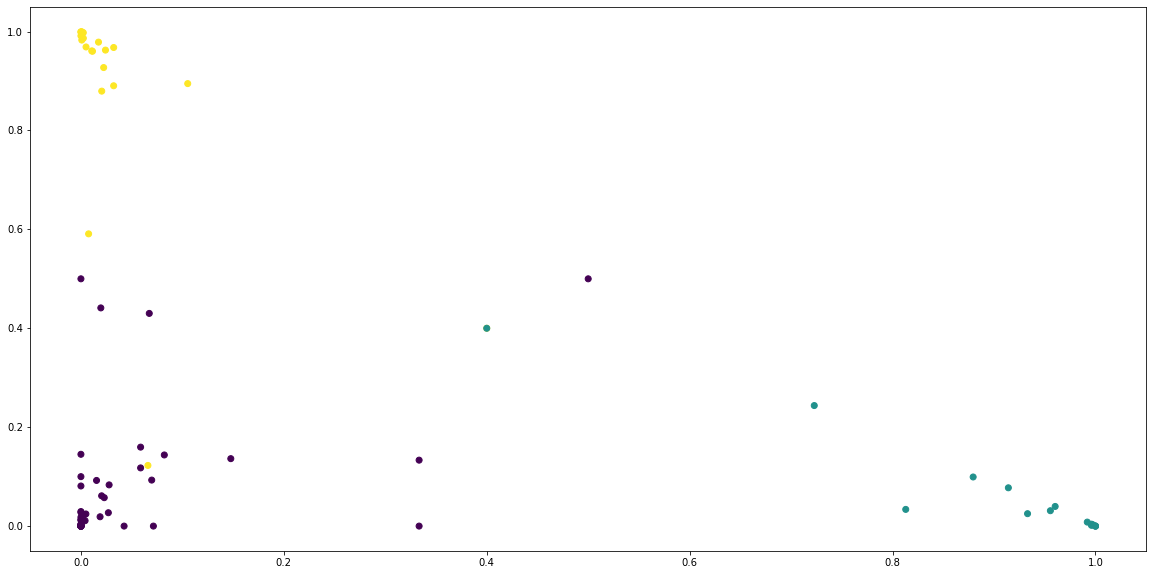

In [15]:
plt.scatter(Traders_df["HFT_percentage"],Traders_df["MIX_percentage"], c=Traders_df["type"],cmap='viridis')
plt.show()

In [16]:
X_traders_train = Traders_df[["HFT_percentage","MIX_percentage"]]
y_traders_train = Traders_df["type"]


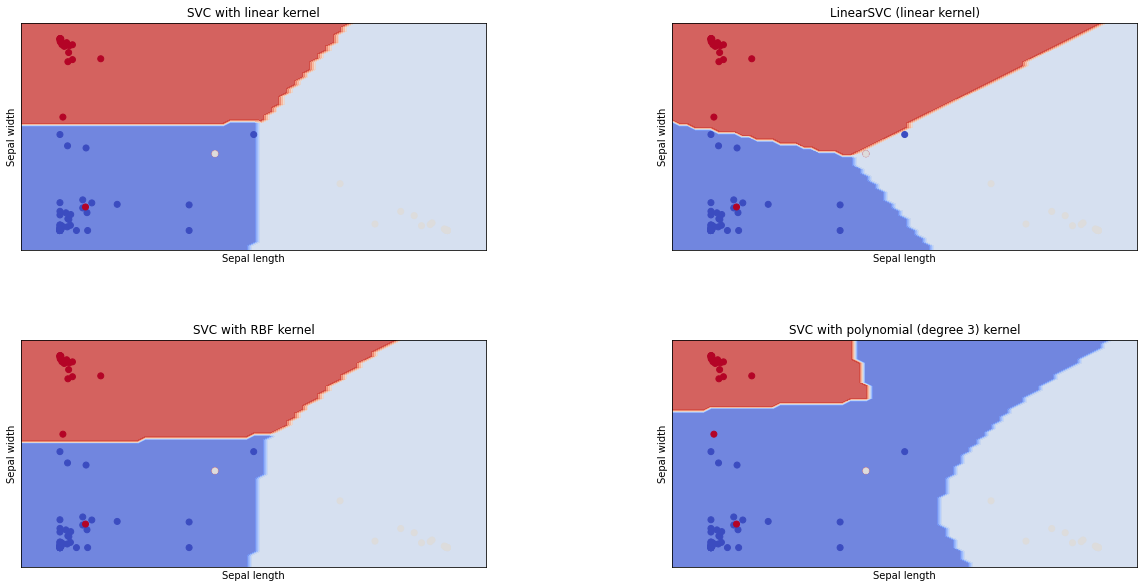

In [17]:
h = .02  # step size in the mesh
C = 1.0
svc = SVC(kernel='linear', C=C).fit(X_traders_train, y_traders_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X_traders_train, y_traders_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X_traders_train, y_traders_train)
lin_svc = LinearSVC(C=C).fit(X_traders_train, y_traders_train)

# create a mesh to plot in
x_min, x_max = X_traders_train["HFT_percentage"].min() - 0.1, X_traders_train["HFT_percentage"].max() + 0.1
y_min, y_max = X_traders_train["MIX_percentage"].min() - 0.1, X_traders_train["MIX_percentage"].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_traders_train["HFT_percentage"], X_traders_train["MIX_percentage"], c=y_traders_train, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()



# Chosing the Best Traders classifier

In [18]:
traders_models_Names = ["RF","SVM","KNN","Gradient boosting","MLP","LDA","QDA"]

traders_classif_RF = RandomForestClassifier()
traders_classif_svm = SVC()
traders_classif_LDA = LinearDiscriminantAnalysis()
traders_classif_QDA = QuadraticDiscriminantAnalysis()
traders_classif_KNN = KNeighborsClassifier()
traders_classif_MLP = MLPClassifier()
traders_classif_GB = GradientBoostingClassifier()

traders_models = [traders_classif_RF,traders_classif_svm,traders_classif_KNN,traders_classif_GB]
param_grid_RF = {'n_estimators': [10,20,30,100,200, 400, 600]}
param_grid_SVC = {'C': [0.01,0.1, 0.3,1, 10],  
              'kernel': ['rbf','linear']}  
param_grid_GB = {'learning_rate':[0.15,0.1,0.05,0.01], 
                 'n_estimators':[10,100,250,500]}
param_grid_KNN = {"n_neighbors": list(range(1,50))}

traders_models_params = [param_grid_RF,param_grid_SVC,param_grid_KNN,param_grid_GB ]

utils.hypertunning_models(traders_models,traders_models_params,traders_models_Names[:4],
                          X_traders_train,y_traders_train,f1_micro)

/home/anas/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


the best params for the model RF are {'n_estimators': 10} and with a score 0.9294117647058824
the best params for the model SVM are {'kernel': 'rbf', 'C': 0.1} and with a score 0.9647058823529411
the best params for the model KNN are {'n_neighbors': 8} and with a score 0.9647058823529411
the best params for the model Gradient boosting are {'n_estimators': 10, 'learning_rate': 0.05} and with a score 0.9529411764705882


In [19]:
tunned_models = [RandomForestClassifier(n_estimators=10),SVC(C=0.1,kernel="rbf"),KNeighborsClassifier(n_neighbors=8),
                GradientBoostingClassifier(learning_rate = 0.05,n_estimators=10),MLPClassifier(),
                LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis()]


SearchTradersClassifier = classifier.BestClassifier(tunned_models,f1_micro,traders_models_Names)
SearchTradersClassifier.search(X_traders_train,y_traders_train)

The best model is SVM with a cross validation score 0.9647058823529411:


In [20]:
SearchTradersClassifier.fit_save(X_traders_train,y_traders_train,"../models/best_traders_model.sav")

# Prepare submission file

In [5]:
row_model = pickle.load(open("../models/best_row_model_fs_RF.sav", 'rb'))
traders_model = pickle.load(open("../models/best_traders_model.sav", 'rb'))
submission = classifier.predict(X_test,row_model,traders_model,RF_feature_subset)

In [6]:
submission_filename = "../data/final_submission.csv"
submission.to_csv(submission_filename,index=False)


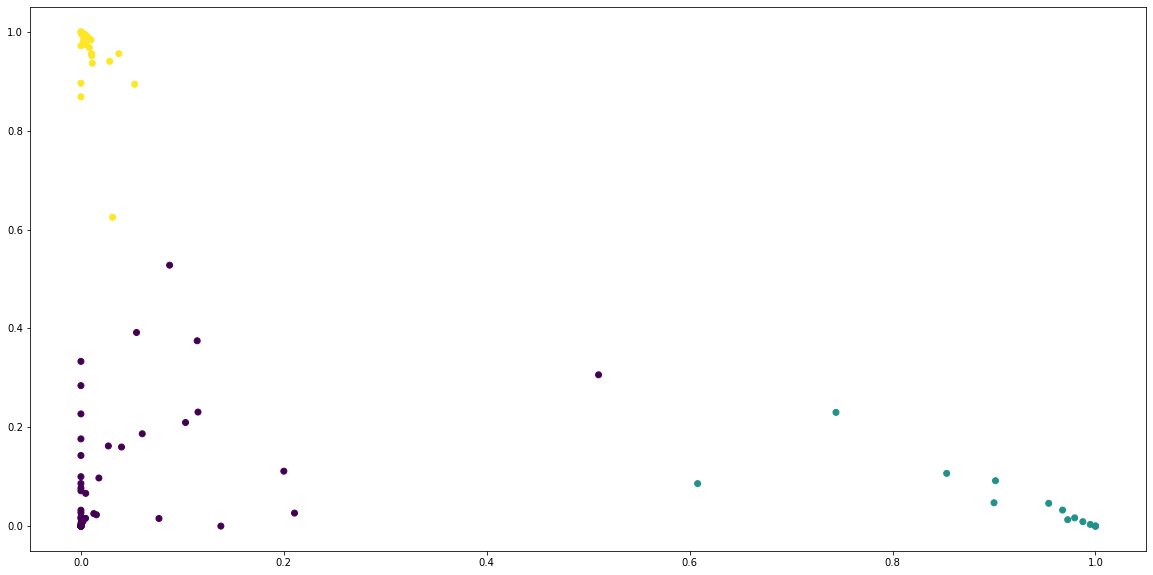

In [7]:
classifier.plot_test(classifier.predict_class_rows(X_test,row_model,RF_feature_subset),traders_model)